## **About PyFAI**:

I will be incoorporating PyFAI alongside another python package called pygix (coming up in another tutorial) into the Wellesley Solar pipeline. 


FAI stands for fast azimuthal integration. PyFAI is a python library used for azimuthal integration of X-ray/neutron/electron data scattered from a detector. 

In this tutorial, I will demonstrate you how to use PyFAI in order to calibrate and integrate .tif images, similarly to what you've probably done in GSAS-II. However, PyFAI and pygix are python libraries that work with GWAXS data and it is so much more flexible than GSAS-II.


The code below was written by Kimberly Hernandez in Spring 2021 and has been applied to the C60 and D7 datasets. 

## Importing and Exporting
The code below will import multiple .tif files of the raw data and import the .poni file with geometry information (this was obtained after you created your calibration through the GUI).
- Import .tif files
- Import the .poni file used to create the XRD 1D figures
- Loop through all of the integrated data, you can plot each of them and also export their data as csv and txt files.

At the end of this code, you will create and export 3 different files.
- CSV file that has the same name as your .tif file. This file contains purely data in two columns, the angles and their corrsponding intensities.
- CSV file that has the same name as your .tif tile but has an additional "data_info". This file contains The exact data the previous CSV has but also has addition lines of information regarding the set-up, calibration and geometry of the experiment. 
- txt file that has the same name as your .tif file. This file only contains those additional lines mentioned in the previous bullet point. Set-up, calibration, geometry etc. 

In [1]:
#Impor all of the needed packages
import glob #A package that helps import data from a directory
import pyFAI #Fast Azimunthal Integration methods to use in Python 
%matplotlib inline #Needed in order to output the plotted images on to the jupyter notebook.
from matplotlib.pyplot import subplots #Package used to display various plots in various subplots.
import fabio #used for reading of raw 2D data from various X-ray detectors
from pyFAI.gui import jupyter #Jupyter Notebook has some advanced visualization features when you use matplotlib and pyFAI. 
import numpy #package that contains a large collection of mathematical functions
import csv #Package needed to export data as a csv


In [2]:
## Make sure to mark the path to where the .tif files are located
## If this python file is located in the same folder in which the .tif data is located, there is no need to mark a path.

#type in the path of where your folder of tif files are located. 
#path = r'C:\Users\kimhd\Hernandez_Kim_Solar_Lab\D6a_MAPbIBr2_C60_lightcycle-20210506T021405Z-001\D6a_MAPbIBr2_C60_lightcycle'
#all_files = sorted(glob.glob(path+"/*.tif"))

In [3]:
#Check pyFAI version you have and import .poni file that will be used
print("Using pyFAI version", pyFAI.version)

#When it comes to loading the .poni file, make sure that insert the path of where the file can be found
#or you can use type in the .poni file by itself if the .poni file is within the same folder of this .py file.
ai = pyFAI.load('C:/Users/kimhd/Hernandez_Kim_Solar_Lab/LaB6_det315_3s_01221009_0001.poni') #load poni file created through the GUI
print(ai)
#ai contains the detector geometry(type,pixel size, distortion) and experimental setup geometry

Using pyFAI version 0.20.0
Detector Rayonix MX225	 PixelSize= 7.324e-05, 7.324e-05 m
Wavelength= 9.762535e-11m
SampleDetDist= 3.156432e-01m	PONI= 2.126757e-01, 1.136402e-01m	rot1=0.003366  rot2= 0.000785  rot3= -0.000001 rad
DirectBeamDist= 315.645mm	Center: x=1537.064, y=2907.122 pix	Tilt=0.198 deg  tiltPlanRotation= 166.879 deg


# C60 DATASET

<ipython-input-4-8b86c5cf7058>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = subplots(1,2, figsize=(10,5)) #**


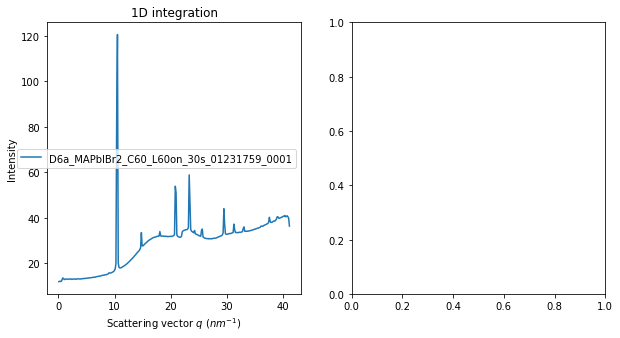

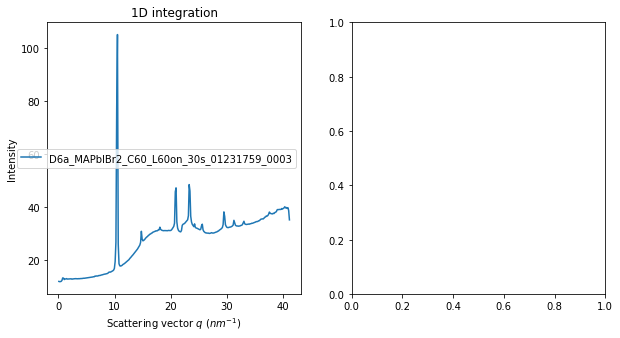

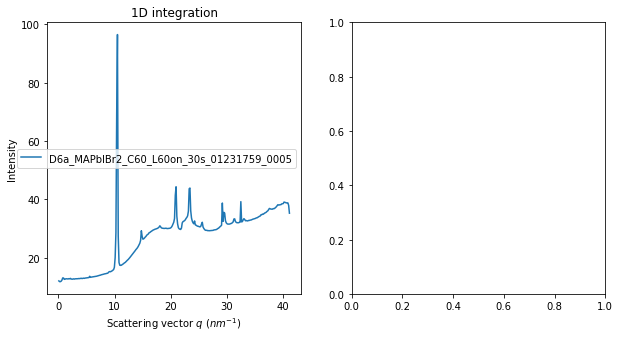

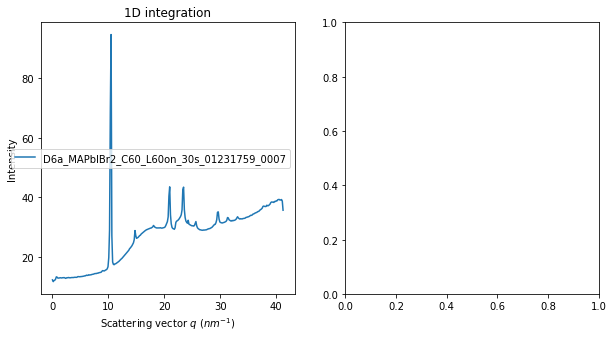

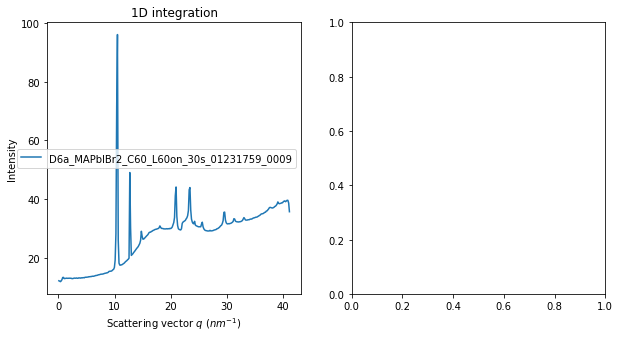

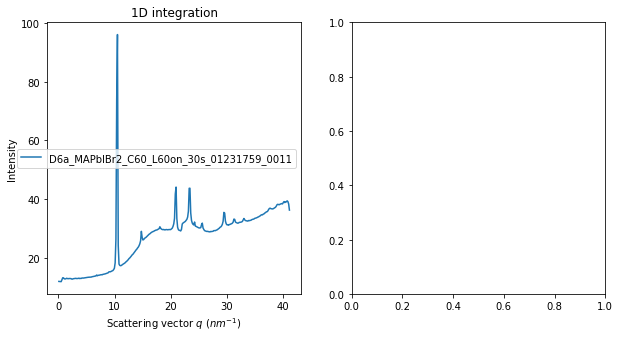

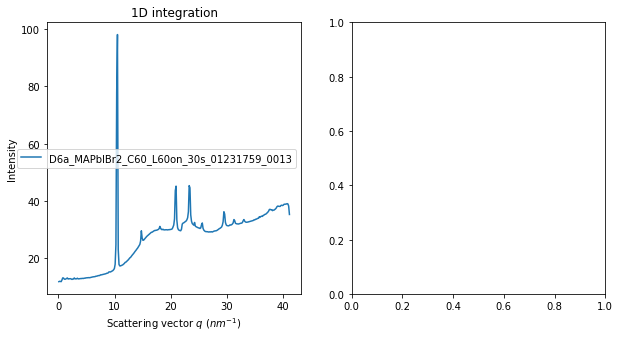

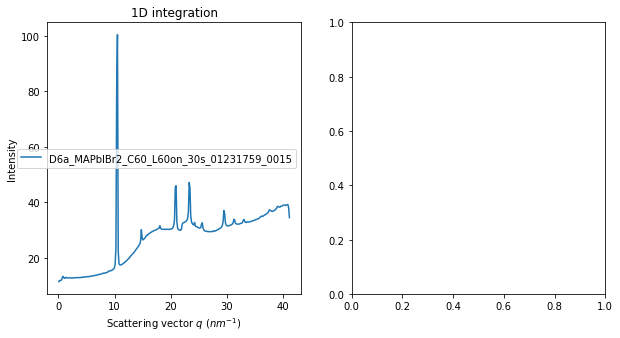

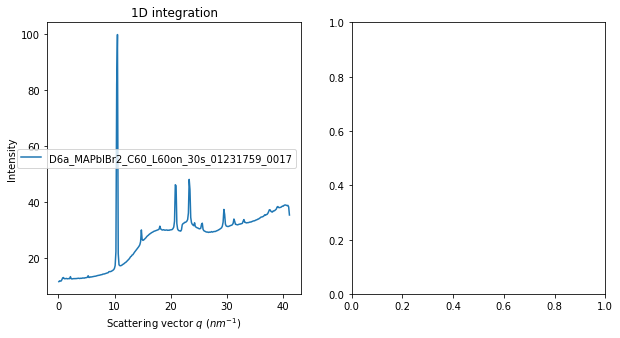

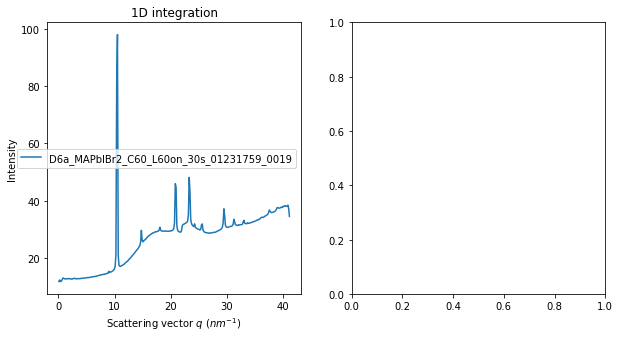

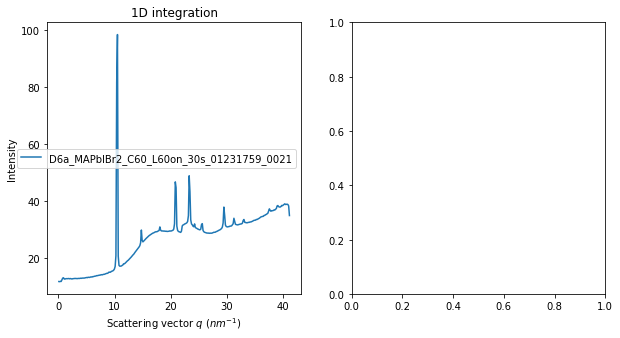

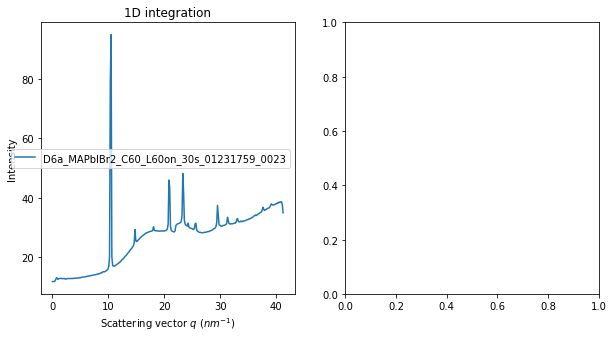

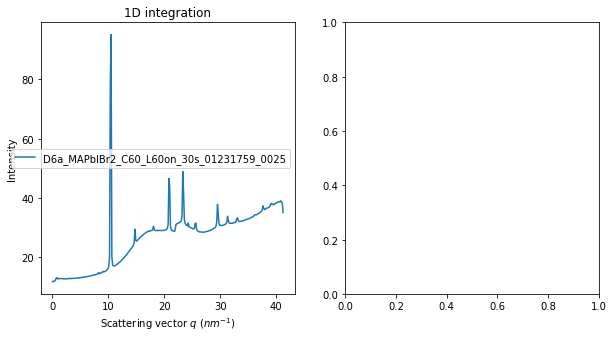

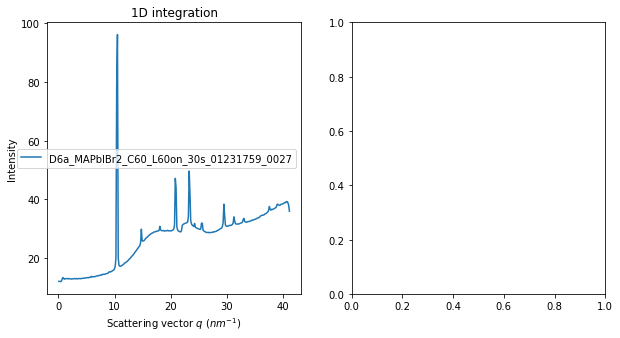

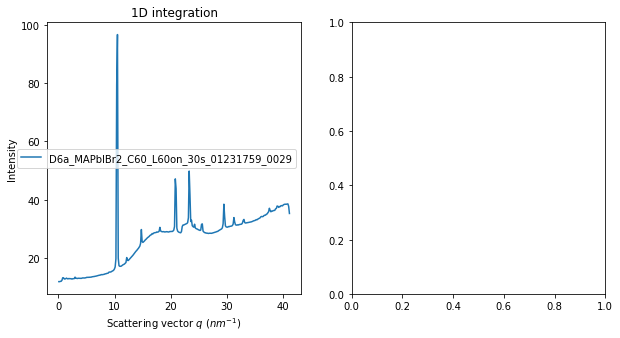

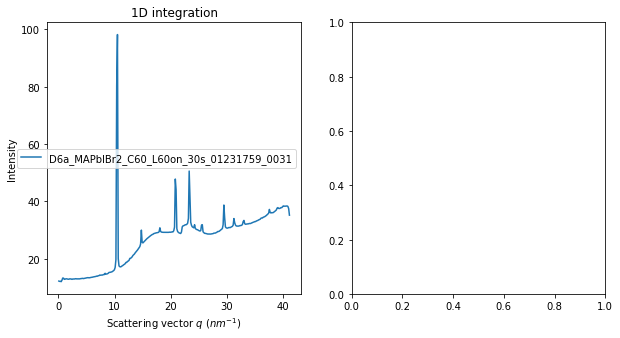

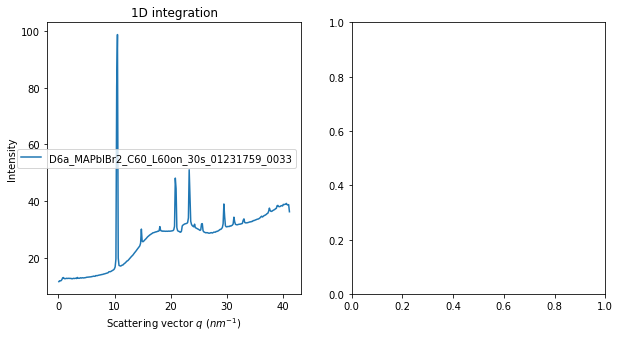

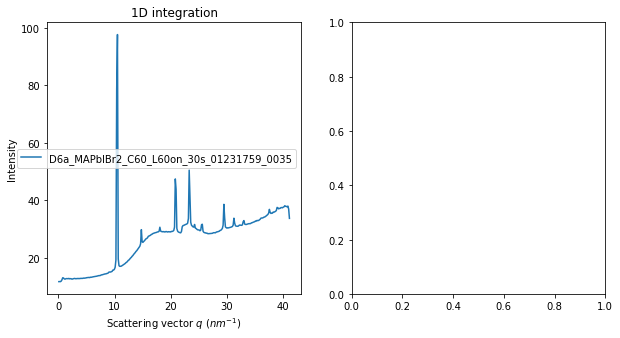

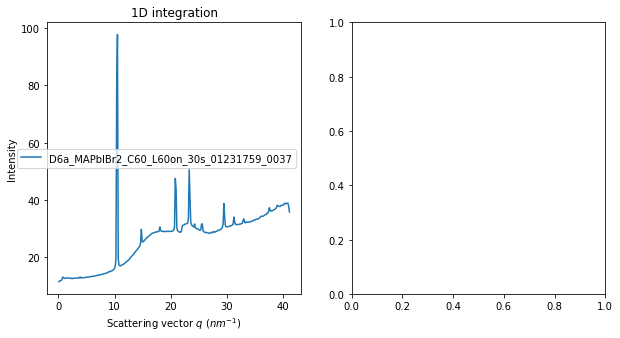

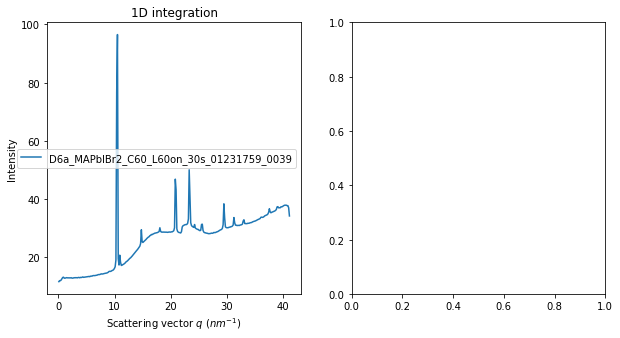

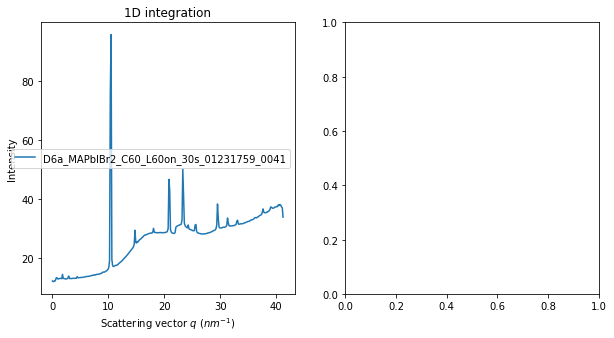

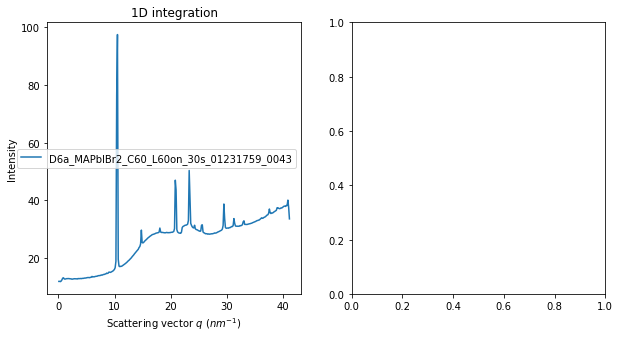

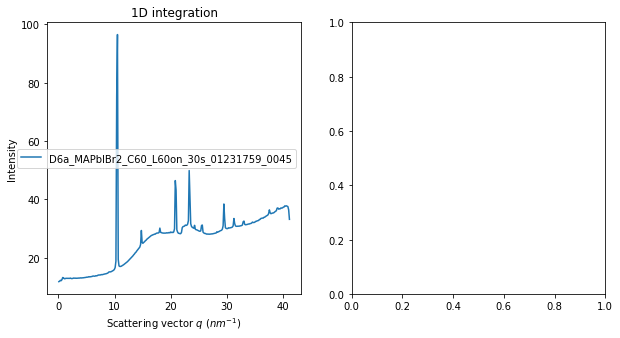

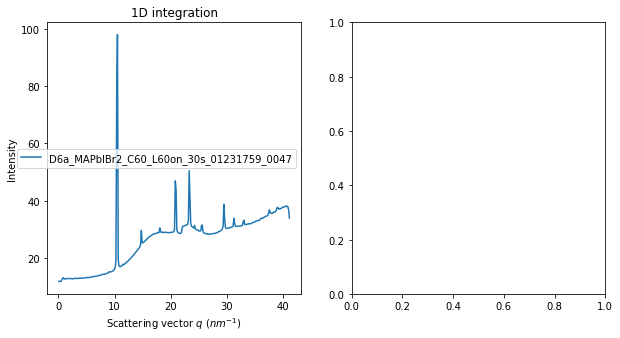

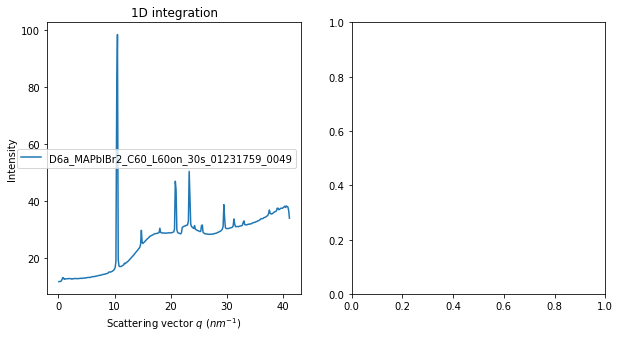

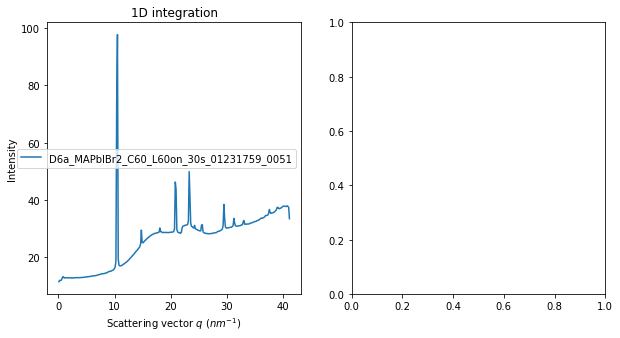

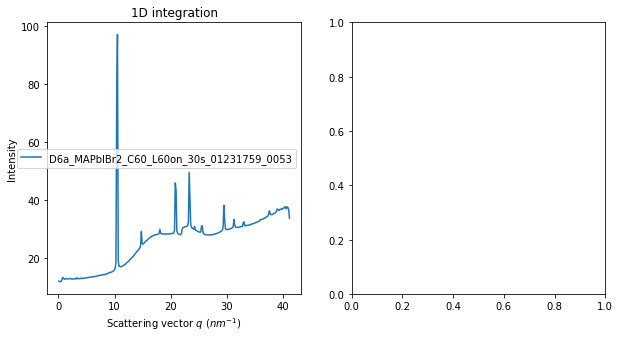

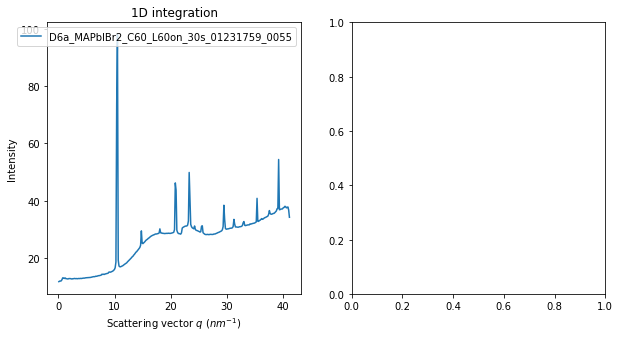

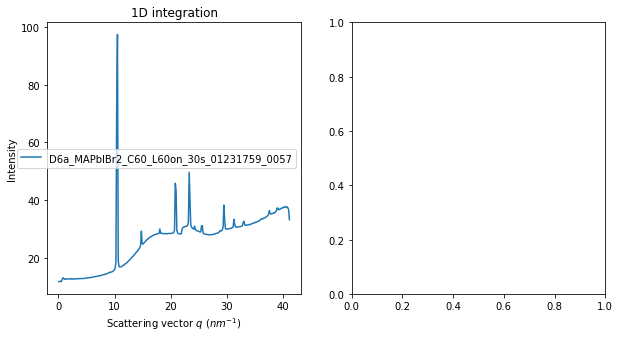

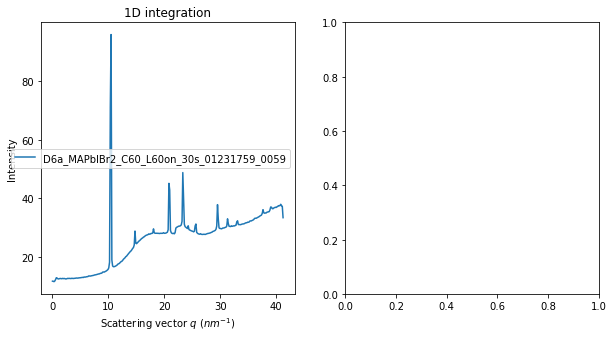

In [4]:
## COMBINING ##

#Since this experiment was taken at alternating angles, .4 to 3 degrees, those specific angles correspond to the an even or odd .tif file
#collected at the site. We must iterate through all files and save the data. 
# even .tif file = surface data = .4 deg
# odd .tif tile = bulk data = 3 deg

image_num=0;

## Make sure to mark the path to where the .tif files are located
## If this python file is located in the same folder in which the .tif data is located, there is no need to mark a path.
save_path = r'C:\Users\kimhd\Hernandez_Kim_Solar_Lab\D6a_MAPbIBr2_C60_lightcycle-20210422T232211Z-001\D6a_MAPbIBr2_C60_lightcycle'

while image_num < len(all_files):
    
    
    if image_num%2 == 0:
        ##ODD .tif files
        
        #Open our precalibrated/raw data and save it under "img"
        img = fabio.open(all_files[image_num]).data 
        
        
        #The commented line below will display the precalibrated data, it is commented out because if we were to diaply
        #all of the images, it would take up to much memory and not sun properly.
        #jupyter.display(img, label = all_files[image_num][-44:-4]) #Depending on the length of the name of your .tif files you can change
                                                                    #the indexing limits. 
        pass
    
        #you can create the resolution of the image by using integrate1d(image to integrate, # of bins, unit="2th_deg" or "q_nm^-1")
        res = ai.integrate1d(img, 300, unit="q_nm^-1") 
        
        #Plotting the XRD data using matplotlib, commented out to preserve memory within this loop. 
        tth = res[0] #the "2th_deg" or "q_nm^-1" data
        I = res[1] #the intensity data
        #Plotting commands, commented below
#         ax[1].plot(tth, I, label=even_surf[image_num][-44:-4])#Depending on the length of the name of your .tif files you can change
                                                                #the indexing limits. 
#         ax[1].set_title("Display 1d powder diffraction data using pure matplotlib")
#         pass
        
    
        
        #Saving the pure integrated data into a csv (the "2th_deg" or "q_nm^-1" data and intensity)
        with open(save_path + all_files[image_num][-45:-4]+'.csv', mode='w',newline='') as integrated_data: #Depending on the length of the name of your .tif files you can change
                                                                                                            #the indexing limits. 
            integrated_writer = csv.writer(integrated_data, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            integrated_writer.writerow(['2th degree', 'I']) #headers for the data columns
            for i in range(len(tth)):
                integrated_writer.writerow([tth[i],I[i]]) #insert the data  

                
                
        #Save integrated pattern data as a 2 column csv file
        #The file created below contains information regarding the integrated image and the actual xrd 1D data
        ai.integrate1d(img,100, unit="2th_deg", filename=save_path + all_files[image_num][-45:-4]+'data_info'+'.csv') #Depending on the length of the name of your .tif files you can change
                                                                                                                      #the indexing limits. 

        list_info = [] #list in order to include all of the integrated image data
        with open(save_path + all_files[image_num][-45:-4]+'data_info'+'.csv') as fd: #will be opening the csv file previously created #Depending on the
                                                                                                                        #length of the name of your .tif files you can change
                                                                                                                        #the indexing limits. 

            for line in range(21): #we will loop down to the 21st line since its the last line that contains the info needed
                list_info.append(fd.readline().strip()+ '\n') #include the '\n' in order to have the data displaced as a column in the txt file
                #saving only the infomation as a txt
                info_file = open(save_path + all_files[image_num][-45:-4],'w') #Depending on the length of the name of your .tif files you can change
                                                                               #the indexing limits. 
                #writing all of the geometry & calibration information into the file which can be opened on notepad
                info_file.writelines(list_info) 
                
                
                
        
        
        
    elif image_num%2 == 1:
        ## EVEN

        #Open our raw data and save it under "img"
        img = fabio.open(all_files[image_num]).data 
        
        #The commented line below will display the precalibrated data, it is commented out because if we were to diaply
        #all of the images, it would take up to much memory and not sun properly.
        #jupyter.display(img, label = all_files[image_num][-44:-4]) #Depending on the length of the name of your .tif files you can change
                                                                    #the indexing limits. 
        pass
    
        #you can create the resolution of the image by using integrate1d(image to integrate, # of bins, unit="2th_deg" or "q_nm^-1")
        res = ai.integrate1d(img, 300, unit="q_nm^-1") 

  
        #Plotting the XRD data using matplotlib, commented out to preserve memory within this loop. 
        tth = res[0] #the "2th_deg" or "q_nm^-1" data
        I = res[1] #the intensity data
#       #Plotting commands, commented below
#       ax[1].plot(tth, I, label=even_surf[image_num][-44:-4])
#       ax[1].set_title("Display 1d powder diffraction data using pure matplotlib")
#       pass
        
    
    
        #Saving the pure integrated data into a csv (the "2th_deg" or "q_nm^-1" data and intensity)
        with open(save_path + all_files[image_num][-45:-4]+'.csv', mode='w',newline='') as integrated_data: #Depending on the length of the name of your .tif files you can change
                                                                                                            #the indexing limits. 
            integrated_writer = csv.writer(integrated_data, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            integrated_writer.writerow(['2th degree', 'I']) #headers for the data columns
            for i in range(len(tth)):
                integrated_writer.writerow([tth[i],I[i]]) #insert the data  
                
                
                
        #Save integrated pattern data as a 2 column csv file
        #The file created below contains information regarding the integrated image and the actual xrd 1D data
        ai.integrate1d(img,100, unit="2th_deg", filename= save_path + all_files[image_num][-45:-4]+'data_info'+'.csv') 

        list_info = [] #list in order to include all of the integrated image data
        with open(save_path + all_files[image_num][-45:-4]+'data_info'+'.csv') as fd: #will be opening the csv file previously created #Depending on the
                                                                                                                        #length of the name of your .tif files you can change
                                                                                                                        #the indexing limits. 

            for line in range(21): #we will loop down to the 21st line since its the last line that contains the info needed
                list_info.append(fd.readline().strip()+ '\n') #include the '\n' in order to have the data displaced as a column in the txt file
                #saving only the infomation as a txt
                info_file = open(save_path + all_files[image_num][-45:-4],'w') #Depending on the length of the name of your .tif files you can change
                                                                               #the indexing limits. 
                #writing all of the geometry & calibration information into the file which can be opened on notepad
                info_file.writelines(list_info) 
           
        
    image_num = image_num +1 #increment needed for the while loop     
    
    
    
